## COMP 135 --- Programming Project II

In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This function reads a file for a given folder with its index,
# and return a list of strings of all the words in the document

def read_file(folder,index):
    dir = folder + '/' + str(index) + '.clean'
    file = open(dir,'r')
    text = file.read().split()
    return text

In [3]:
f = read_file("ibmmac",135)
print f

['From', 'genek', 'ucsb', 'edu', 'Gene', 'Kostruba', 'Subject', 'Diamond', 'Speedstar', 'HiColor', 'card', 'Message', 'ID', '8236', 'ucsbcsl', 'ucsb', 'edu', 'Date', '16', 'Apr', '93', '01', '33', '01', 'GMT', 'Sender', 'root', 'ucsbcsl', 'ucsb', 'edu', 'Organization', 'University', 'of', 'California', 'Santa', 'Barbara', 'Lines', '15', 'I', 'have', 'a', '486DX33', 'ISA', 'system', 'with', '4', 'meg', 'I', 'am', 'using', 'a', 'Diamond', 'Speedstar', 'HiColor', 'video', 'card', 'with', '1', 'meg', 'VRAM', 'and', 'a', 'standard', 'CTX', '14', 'in', 'SVGA', 'monitor', 'When', 'I', 'am', 'running', 'Windows', 'and', 'I', 'have', 'overlapping', 'windows', 'say', 'an', 'application', 'overlapping', 'the', 'program', 'manager', 'window', 'and', 'I', 'close', 'the', 'active', 'application', 'window', 'erasure', 'is', 'very', 'slow', 'The', 'part', 'of', 'the', 'window', 'that', 'is', 'not', 'overlapping', 'is', 'erased', 'first', 'very', 'slowly', 'This', 'also', 'happens', 'when', 'I', 'iconi

In [4]:
# This function reads the label files (index_train and index_test)
# for a given folder and a given size (0.1 to 1).
# It returns a dictionary with document index as keys and "yes" or "no" as values,
# It also returns two other dictionaries for separated positive and negative examples.


def read_label(folder, file_name, size):
    dir = folder + '/' + file_name
    file = open(dir,'r')
    l = file.read().split("\n")
    if "" in l:
        l.remove("")
    
    N = int(size * len(l))
    label = {}
    label_pos = {}
    label_neg = {}
    for line in l[0:N]:
        [key, val] = line.split("|")[0:2]
        label[int(key)] = val
        if val == "yes":
            label_pos[int(key)] = val
        else:
            label_neg[int(key)] = val
    
    return label, label_pos, label_neg

In [5]:
train_labels, label_pos, label_neg = read_label("ibmmac", "index_train", 0.2)
print "all labels = ", train_labels
print " "
print "positive labels = ", label_pos

all labels =  {6: 'yes', 9: 'yes', 294: 'yes', 175: 'yes', 31: 'yes', 34: 'yes', 36: 'yes', 41: 'yes', 42: 'yes', 49: 'yes', 50: 'yes', 56: 'yes', 59: 'yes', 62: 'yes', 684: 'no', 73: 'yes', 75: 'yes', 78: 'yes', 79: 'yes', 80: 'yes', 87: 'yes', 97: 'yes', 101: 'yes', 785: 'no', 700: 'no', 109: 'yes', 623: 'no', 112: 'yes', 114: 'yes', 630: 'no', 631: 'no', 127: 'yes', 640: 'no', 641: 'no', 131: 'yes', 645: 'no', 134: 'yes', 653: 'no', 142: 'yes', 144: 'yes', 145: 'yes', 661: 'no', 152: 'yes', 154: 'yes', 668: 'no', 157: 'yes', 158: 'yes', 671: 'no', 160: 'yes', 675: 'no', 172: 'yes', 686: 'no', 797: 'no', 176: 'yes', 183: 'yes', 184: 'yes', 188: 'yes', 202: 'yes', 191: 'yes', 195: 'yes', 714: 'no', 204: 'yes', 717: 'no', 207: 'yes', 209: 'yes', 723: 'no', 724: 'no', 725: 'no', 216: 'yes', 731: 'no', 222: 'yes', 736: 'no', 227: 'yes', 229: 'yes', 230: 'yes', 231: 'yes', 745: 'no', 746: 'no', 235: 'yes', 749: 'no', 238: 'yes', 755: 'no', 760: 'no', 766: 'no', 767: 'no', 770: 'no', 771: 

In [6]:
# This function trains our model with two types of variant
# It takse in four arguments:
# 
# folder: "ibmmac" or "sport" for two different folders
# size: 0.1, 0.2, ..., 1 for different training set sizes
# m: is the smoothing parameter
# train_type: 1 or 2 for two types of variant
# 
# It returns four variables:
# pos_rate: P(+)
# neg_rate: P(-)
# vocab_pos: is a dictionary with all words in vocabulary as its keys and P(word|+) as its values
# vocab_neg: is a dictionary with all words in vocabulary as its keys and P(word|-) as its values

def train(folder, size, m, train_type):
    
    # Call previous defined function to import the index and labels 
    train_labels, label_pos, label_neg = read_label(folder, "index_train", size)
    
    # Create a vocabulary using documents in the training set
    words = []
    for i in train_labels.keys():
        words += read_file(folder,i)
    all_words = set(words)
    
    # Initialization
    vocab_pos = dict.fromkeys(all_words,0)
    vocab_neg = dict.fromkeys(all_words,0)
    
    if train_type == 1: # If type 1 variant
        for i in label_pos.keys(): # For all documents in positive examples
            text = read_file(folder,i) # Read the document
            for word in text: # For all words in the document
                vocab_pos[word] += 1 # Count for each appearance of the word
        for i in label_neg.keys(): # Simlar for all the negative examples
            text = read_file(folder,i)
            for word in text:
                vocab_neg[word] += 1
        
        # Define #c and V for the type 1 case
        num_c_pos = sum(vocab_pos.values())
        num_c_neg = sum(vocab_neg.values())
        V = len(all_words)
        
        # Compute P(word|+) and P(word|-)
        for key in vocab_pos.keys():
            vocab_pos[key] = float(vocab_pos[key] + m) / (num_c_pos + m * V)
        for key in vocab_neg.keys():
            vocab_neg[key] = float(vocab_neg[key] + m) / (num_c_neg + m * V)
    
    # Similar for type 2 variant
    if train_type == 2:
        for i in label_pos.keys():
            text = read_file(folder,i)
            for word in set(text):
                vocab_pos[word] += 1    
        for i in label_neg.keys():
            text = read_file(folder,i)
            for word in set(text):
                vocab_neg[word] += 1
        
        # Different definitions for #c and V for type 2 variant
        num_c_pos = len(label_pos)
        num_c_neg = len(label_neg)
        V = 2
        
        for key in vocab_pos.keys():
            vocab_pos[key] = float(vocab_pos[key] + m) / (num_c_pos + m * V)
        for key in vocab_neg.keys():
            vocab_neg[key] = float(vocab_neg[key] + m) / (num_c_neg + m * V)        

    # Compute P(+) and P(-)
    pos_rate = float(len(label_pos))/len(train_labels)
    neg_rate = float(len(label_neg))/len(train_labels)
    
    return vocab_pos, vocab_neg, pos_rate, neg_rate

In [7]:
# This function makes the prediction on the test data
# It takes the same four arguments as in function "train"
# and returns the predicted labels for the test data.
# It also returns the test labels for convenience

def predict(folder, size, m, train_type):
    
    # Read in test labels
    test_label, test_pos, test_neg = read_label(folder, "index_test", 1)
    
    # Train our model
    vocab_pos, vocab_neg, pos_rate, neg_rate = train(folder, size, m, train_type)
    
    # Initialize the predicted labels
    predicted_labels = dict.fromkeys(test_label.keys(),"")
    
    if train_type == 1:
        for i in test_label.keys(): # For all documents in the test set
            text = read_file(folder,i) # Read in a document
            
            # Initialize + and - score to be P(+) and P(-)
            score_pos = np.log(pos_rate)
            score_neg = np.log(neg_rate)
            for word in text: # For all words in the document
                if (word in vocab_pos) or (word in vocab_neg): # If the word appears in either class, update the scores
                    score_pos += np.log(vocab_pos[word])
                    score_neg += np.log(vocab_neg[word])
            # The case when m = 0 is taken care of by the numpy.log function, as shown below
            
            # Predict by comparing the two scores
            if score_pos > score_neg:
                predicted_labels[i] = "yes"
            else:
                predicted_labels[i] = "no"
    
    if train_type == 2: # Type 2 is a little different
        for i in test_label.keys():
            text = read_file(folder,i)
            
            score_pos = math.log(pos_rate)
            score_neg = math.log(neg_rate)
            for word in vocab_pos.keys(): # For all words in vocabulary
                if word in text: # If the word is in the document, update the scores by P(1|+/-)
                    score_pos += np.log(vocab_pos[word])
                    score_neg += np.log(vocab_neg[word])
                else: # If the word is NOT in the document, update the score by P(0|+/-) = 1 - P(1|+/-)
                    score_pos += np.log(1 - vocab_pos[word])
                    score_neg += np.log(1 - vocab_neg[word])
            # The case when m = 0 is taken care of by the numpy.log function, as shown below
            
            # Predict by comparing the two scores
            if score_pos > score_neg:
                predicted_labels[i] = "yes"
            else:
                predicted_labels[i] = "no"
    
    return test_label, predicted_labels

In [30]:
# Handling m = 0
# numpy has a logarithm function that handles m = 0 perfectly, as shown below:

print np.log(0)
print np.log(0) + 0.3
print np.log(0) == np.log(0) + 0.3
print np.log(0) < 0.12

-inf
-inf
True
True


In [8]:
# This function compute the accuracy of our algorithm
# Accuracy = correctly predicted labels / all labels

def compute_accuracy(test_labels, predicted_labels):
    acc = 0
    for key in test_labels.keys():
        if test_labels[key] == predicted_labels[key]:
            acc += 1
    acc = float(acc)/len(tl)
    return acc

## Evaluation Part I

In [175]:
learning_curve_ibmmac_221 = []
learning_curve_ibmmac_222 = []
learning_curve_ibmmac_223 = []
learning_curve_ibmmac_224 = []
size_vec = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for s in size_vec:
    test_labels, predicted_labels = predict(folder = "ibmmac", size = s, m = 0, train_type = 1)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_ibmmac_221.append(acc)

for s in size_vec:
    test_labels, predicted_labels = predict(folder = "ibmmac", size = s, m = 1, train_type = 1)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_ibmmac_222.append(acc)

for s in size_vec:
    test_labels, predicted_labels = predict(folder = "ibmmac", size = s, m = 0, train_type = 2)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_ibmmac_223.append(acc)

for s in size_vec:
    test_labels, predicted_labels = predict(folder = "ibmmac", size = s, m = 1, train_type = 2)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_ibmmac_224.append(acc)

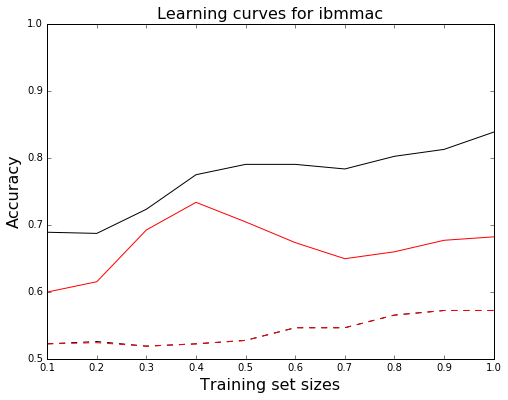

In [14]:
plt.figure(figsize=(8,6))
plt.plot(size_vec, learning_curve_ibmmac_221, "k--",
         size_vec, learning_curve_ibmmac_222, "k-" ,
         size_vec, learning_curve_ibmmac_223, "r--",
         size_vec, learning_curve_ibmmac_224, "r-" )
plt.ylim(0.5,1)
plt.xlabel("Training set sizes", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
#plt.legend(["Type 1, m = 0","Type 1, m = 1","Type 2, m = 0","Type 2, m = 1"], loc =2)
plt.title("Learning curves for ibmmac", fontsize = 16)

In [221]:
learning_curve_sport_221 = []
learning_curve_sport_222 = []
learning_curve_sport_223 = []
learning_curve_sport_224 = []
size_vec = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for s in size_vec:
    test_labels, predicted_labels = predict(folder = "sport", size = s, m = 0, train_type = 1)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_sport_221.append(acc)

for s in size_vec:
    test_labels, predicted_labels = predict(folder = "sport", size = s, m = 1, train_type = 1)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_sport_222.append(acc)

for s in size_vec:
    test_labels, predicted_labels = predict(folder = "sport", size = s, m = 0, train_type = 2)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_sport_223.append(acc)

for s in size_vec:
    test_labels, predicted_labels = predict(folder = "sport", size = s, m = 1, train_type = 2)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_sport_224.append(acc)

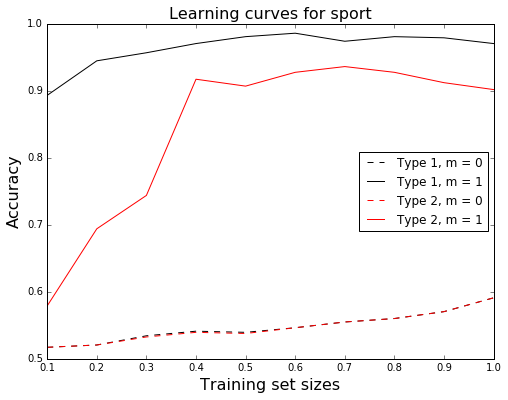

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(size_vec, learning_curve_sport_221, "k--",
        size_vec, learning_curve_sport_222, "k-" ,
        size_vec, learning_curve_sport_223, "r--",
        size_vec, learning_curve_sport_224, "r-" )
plt.ylim(0.5,1)
plt.xlabel("Training set sizes", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
lg = ["Type 1, m = 0","Type 1, m = 1","Type 2, m = 0","Type 2, m = 1"]
lgd = ax.legend( lg, loc='center right', bbox_to_anchor=(1, 0.5))
plt.title("Learning curves for sport", fontsize = 16)

## Discussion:

From the above two pictures, there are a few observations can be made:

* Type 1 variant of Naive Bayes outperforms Type 2 variant. Type 1 variant not only has better accuracy but also is faster than Type 2 variant. 
    
    Since our vocabulary is large, for example more than 15,000 words in ibm/mac folder, and type 2 variant assumes that each document has as many features as the entire vocabulary. Therefore, even a document has only about 100 words, to compute its +/- scores, we need to sum over 15,000 numbers, and that makes it very time consuming. 
    

* For both types and folders, our algorithms perform much better with smoothing than without smoothing

    Form the figures, we can see that, without smoothing, the accuracies of our algorithms drop down to 50% and hardly to be imporved by increasing the training set sizes. This is because there are words with 0 frequencies without smoothing. When we compute the +/- scores for the document with 0 frequency words, the score will simply equal to 0. That menas the scores are determined simply by this one word in spite of all other words. Therefore, we lost a lot of information when predicting the labels for this document.
    

* Increasing the training set size generally improve the performance of our algorithms.

    This is generally true because the more data the better. However, there is a little exception for the type 2 variant for ibm/mac folder, where the best performance happens at when training set size = 0.4N

## Evaluation Part II

In [248]:
m_vec = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
         1, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.]
learning_curve_m_ibmmac_type1 = []
learning_curve_m_ibmmac_type2 = []
learning_curve_m_sport_type1 = []
learning_curve_m_sport_type2 = []

for m_i in m_vec:
    test_labels, predicted_labels = predict(folder = "ibmmac", size = 1, m = m_i, train_type = 1)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_m_ibmmac_type1.append(acc)
for m_i in m_vec:
    test_labels, predicted_labels = predict(folder = "ibmmac", size = 1, m = m_i, train_type = 2)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_m_ibmmac_type2.append(acc)
for m_i in m_vec:
    test_labels, predicted_labels = predict(folder = "sport", size = 1, m = m_i, train_type = 1)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_m_sport_type1.append(acc)
for m_i in m_vec:
    test_labels, predicted_labels = predict(folder = "sport", size = 1, m = m_i, train_type = 2)
    acc = compute_accuracy(test_labels, predicted_labels)
    learning_curve_m_sport_type2.append(acc)

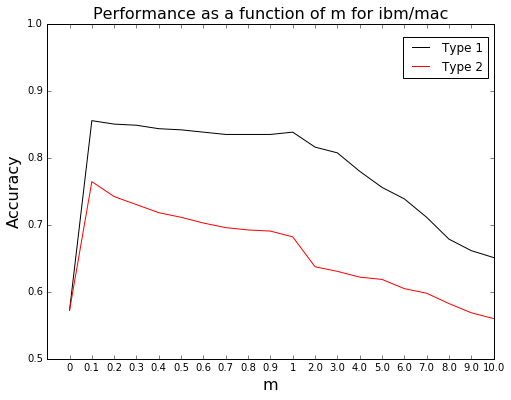

In [24]:
x = np.arange(1,21)
x_labels = [str(m_vec[i]) for i in range(len(m_vec))]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, learning_curve_m_ibmmac_type1, "k-",
        x, learning_curve_m_ibmmac_type2, "r-")
plt.ylim(0.5,1)
plt.xlabel("m", fontsize = 16)
plt.xticks(x,x_labels)
plt.ylabel("Accuracy", fontsize = 16)
lg = ["Type 1","Type 2"]
lgd = ax.legend( lg, loc='center right', bbox_to_anchor=(1, 0.9))
plt.title("Performance as a function of m for ibm/mac", fontsize = 16)

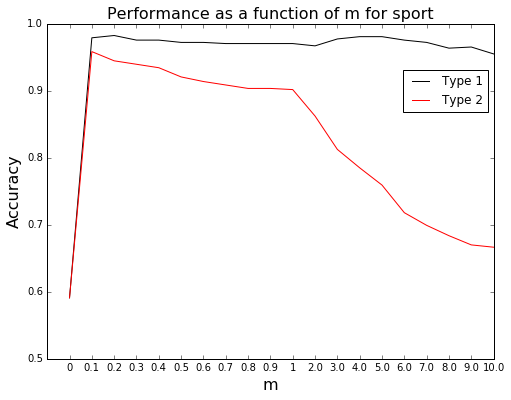

In [25]:
x = np.arange(1,21)
x_labels = [str(m_vec[i]) for i in range(len(m_vec))]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, learning_curve_m_sport_type1, "k-",
        x, learning_curve_m_sport_type2, "r-")
plt.ylim(0.5,1)
plt.xlabel("m", fontsize = 16)
plt.xticks(x,x_labels)
plt.ylabel("Accuracy", fontsize = 16)
lg = ["Type 1","Type 2"]
lgd = ax.legend( lg, loc='center right', bbox_to_anchor=(1, 0.8))
plt.title("Performance as a function of m for sport", fontsize = 16)

## Discussion:

From the above figures, we can see that smoothing (where $m \neq 0$) outperforms heavily without smoothing (where $m = 0$). However, adding too much smoothing would worsen the performance of our algorithms.

In the ibm/mac folder, the performances of type 1 and type 2 algorithm both spike when $m$ goes from 0 to 0.1. The performance of type 1 keeps at a high value for small values of m and then slowly goes down when $m > 1$. The performance of type 2 just goes down slowly with the increase of m.

In the sport folder, after the similar initial spike, the performance of type 1 keeps at a high value while the performance of type 2 goes down again with the increase of m.